# Autonomous Systems Exploration



### Topic 1: Robustness
#### Random Failure versus Targeted Attack
This notebook will compare the graphs of AS organizations connectivity with respect to their susceptibility

In [2]:
# load all libraries
import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import operator


In [10]:
# adapted slightly from code by Yong-Yeow Ahn
def random_removal(graph, remove_frac):
    
    
    # copy graph
    agraph = graph.copy()
    
    # We need to calculate the current size of the largest component
    initial_largest = len(largest_component(agraph))
    
    # remove nodes
    agraph.remove_nodes_from(np.random.choice(agraph.nodes(), size=int(remove_frac*len(agraph)), replace=False))
    
    # Now lets calculate our order parameter, while handling
    # the case that the graph is empty
    if len(agraph) > 0:
        relative_size_of_largest = len(max(nx.connected_component_subgraphs(agraph), key=len)) / initial_largest
    else:
        relative_size_of_largest = 0.0
        
    return relative_size_of_largest

In [4]:
def largest_component(g):

    # We need to calculate the current size of the largest component
    largest = max(nx.connected_component_subgraphs(g), key=len)
    return largest

In [6]:
# read in the AS nodes
as_graph = nx.read_gml('as-22july06.gml')
print("Original Graph Information: {0}".format(nx.info(as_graph)))
as_lgraph = largest_component(as_graph)
print("\nLargest Component Information: {0}".format(nx.info(as_lgraph)))
# This will be our list of fractions to run the simulation over
fractions = np.linspace(0.0, 1.0, 30)


Original Graph Information: Name: 
Type: Graph
Number of nodes: 22963
Number of edges: 48436
Average degree:   4.2186

Largest Component Information: Name: 
Type: Graph
Number of nodes: 22963
Number of edges: 48436
Average degree:   4.2186


In [7]:
# Lets do 20 trials for each fraction and take the mean, then do that for each fraction
ran_results = [ np.mean([random_removal(as_graph, frac) for i in range(10)]) for frac in fractions ]
print (ran_results)

[1.0, 0.95207507729826235, 0.90799111614336125, 0.86301876932456556, 0.81525497539520109, 0.76680747289117279, 0.7173104559508775, 0.67550842659931187, 0.63426817053520879, 0.58369986500021775, 0.53830074467621836, 0.49014066106345, 0.44539912032399948, 0.40152854592170006, 0.35300701127901407, 0.31409223533510428, 0.28241954448460566, 0.2359926838827679, 0.21079127291730174, 0.17277359230065761, 0.14262509254017333, 0.1215433523494317, 0.082950833950267838, 0.064042154770718118, 0.037865261507642731, 0.027535600749031046, 0.015111265949571049, 0.0070374080041806387, 0.0020119322388189699, 0.0]


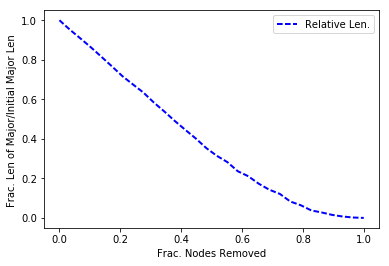

In [8]:
# Now lets plot the results
plt.plot(fractions, ran_results, 'b--', lw=2,label='Relative Len.')
plt.legend()
plt.xlabel("Frac. Nodes Removed")
plt.ylabel("Frac. Len of Major/Initial Major Len ")


In [11]:
##############################################################
# description: create attack simulator graph that removed nodes by degree
#
#
#
# output: float # fraction of size of largest connectect component / largest component of original
# notes: adapted from code by Yong-Yeow Ahn
#############################################################
def target_attack(graph, remove_frac, graph_collector):
    
    # get the list of nodes and degrees into a sorted list of Tuples
    sorted_nodes_tup = sorted(nx.degree(graph).items(),reverse=True, key=operator.itemgetter(1))
    # tuples are immutable, so need a list in order of degree to delete from teh largest to smallest
    sorted_nodes_lst = list(sorted_nodes_tup)
    
    # First, lets copy the graph so we don't change the original
    graph = graph.copy()
    
    # We need to calculate the current size of the largest component
    initial_largest = len(max(nx.connected_component_subgraphs(graph), key=len))
    
    # remove the fraction of largest nodes
    removed = int(remove_frac*len(sorted_nodes_lst))
    #print(nx.degree(graph))
    #print(sorted_nodes_lst)
    
    # loop through the removed nodes and delete them
    for i in range(removed):
        #print('remove:', i, 'node:', sorted_nodes_lst[i])
        graph.remove_node(sorted_nodes_lst[i][0])
        
    graph_collector.append(graph)
    
    if len(graph) > 0:
        relative_size_of_largest = len(max(nx.connected_component_subgraphs(graph), key=len)) / initial_largest
    else:
        relative_size_of_largest = 0.0
        
    return relative_size_of_largest



In [12]:
# keep a graph collector so we can look at paths as the major component shrinks
graph_collector = [] # list of graphs
# Lets do 20 trials for each fraction and take the mean, then do that for each fraction
tar_results = [ np.mean([target_attack(as_graph, frac, graph_collector) for i in range(10)]) for frac in fractions ]



In [30]:
# find where largest component drops below 1% of original size
count =0
print("Targeted Attack")
for item in tar_results:
    if item < .01:
        print ("critical number:", item)
        print ("attack fraction:", fractions[count])
        break
    count += 1

print (tar_results)

Targeted Attack
critical number: 0.000740321386578
attack fraction: 0.0689655172414
[1.0, 0.017767713277881812, 0.00074032138657840877, 0.00034838653486042766, 0.00026128990114532074, 0.00026128990114532074, 0.00021774158428776723, 0.00013064495057266037, 0.00013064495057266037, 0.00013064495057266037, 0.00013064495057266037, 8.7096633715106914e-05, 8.7096633715106914e-05, 8.7096633715106914e-05, 8.7096633715106914e-05, 8.7096633715106914e-05, 8.7096633715106914e-05, 8.7096633715106914e-05, 8.7096633715106914e-05, 8.7096633715106914e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 4.3548316857553457e-05, 0.0]


## Plotting the results of the two graphs

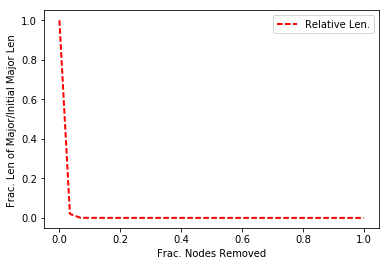

In [13]:
# Now lets plot the results
plt.plot(fractions,tar_results, 'r--', lw=2,label='Relative Len.')
plt.legend()
plt.xlabel("Frac. Nodes Removed")
plt.ylabel("Frac. Len of Major/Initial Major Len ")


## Path Failures

In [14]:
len(graph_collector)
# we do not need 10 graphs for each fraction  keep one
new_graphs = graph_collector[10-1::10]
num = 1
for item in new_graphs:
    print(id(item))
    print("\ngraph #: {0}, Info: {1}".format(num, nx.info(item)))
    num += 1


2473522615912

graph #: 1, Info: Name: 
Type: Graph
Number of nodes: 22963
Number of edges: 48436
Average degree:   4.2186
2473573817480

graph #: 2, Info: Name: 
Type: Graph
Number of nodes: 22172
Number of edges: 6352
Average degree:   0.5730
2473548567720

graph #: 3, Info: Name: 
Type: Graph
Number of nodes: 21380
Number of edges: 3198
Average degree:   0.2992
2473565802448

graph #: 4, Info: Name: 
Type: Graph
Number of nodes: 20588
Number of edges: 1819
Average degree:   0.1767
2473565761152

graph #: 5, Info: Name: 
Type: Graph
Number of nodes: 19796
Number of edges: 1126
Average degree:   0.1138
2473565866136

graph #: 6, Info: Name: 
Type: Graph
Number of nodes: 19004
Number of edges: 803
Average degree:   0.0845
2473565896600

graph #: 7, Info: Name: 
Type: Graph
Number of nodes: 18213
Number of edges: 569
Average degree:   0.0625
2473565731472

graph #: 8, Info: Name: 
Type: Graph
Number of nodes: 17421
Number of edges: 348
Average degree:   0.0400
2473565688160

graph #: 9,

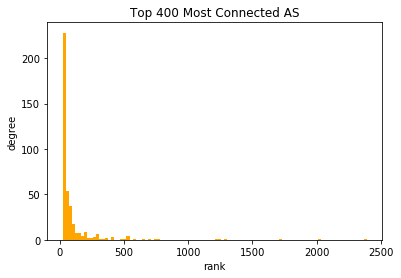

In [16]:
#degree distribution
degree_sequence=sorted(nx.degree(as_graph).values()) # degree sequence
r_degree_sequence=sorted(nx.degree(as_graph).values(), reverse=True) # degree sequence
#print(degree_sequence[:40])
leng = len(degree_sequence)

plt.hist(degree_sequence[leng-400:], facecolor = 'orange', bins=100)
plt.title("Top 400 Most Connected AS")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()


In [20]:
print(nx.shortest_path(as_graph, '87','52'))
print(nx.shortest_path(new_graphs[1], '87','52'))

['87', '19782', '3356', '2152', '52']


NetworkXNoPath: No path between 87 and 52.

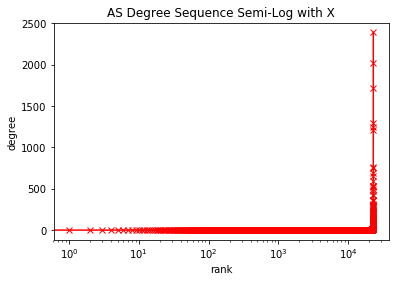

In [32]:
plt.plot(degree_sequence, 'r', marker='x')
plt.title("AS Degree Sequence Semi-Log with X")
plt.ylabel("degree")
plt.xlabel("rank")
plt.xscale('log')
plt.show()

In [34]:
as_g_bt = nx.betweenness_centrality(as_graph)

In [42]:
import pandas as pd
df = pd.DataFrame(list(as_g_bt.items()),columns=['AS','betweenness'])
dfr = df.sort_values('betweenness',ascending=False)
print(dfr)

          AS  betweenness
4430     701     0.144697
3081    1239     0.132111
12863   3356     0.124733
20115   7018     0.111697
10322    174     0.080197
10841   1299     0.078414
15758    209     0.068879
19598   3549     0.067246
9960     702     0.046010
11128   4323     0.039194
4158    6461     0.038115
14658   3320     0.037488
17053   2914     0.037407
20295   3303     0.036678
22493   7132     0.032968
1144    3491     0.029338
22536   6453     0.029067
22720   3561     0.027925
5516    2828     0.023985
2654    8220     0.023286
20294   1273     0.022560
17532   3257     0.022207
5110    6395     0.022053
17793   8342     0.022049
5001    3786     0.018986
19680   4513     0.018623
8021    4637     0.017468
16285   4766     0.017123
19990   6939     0.016169
8262   20485     0.015757
...      ...          ...
13976  22183     0.000000
13977   9247     0.000000
5627     808     0.000000
5625   12516     0.000000
5641   23324     0.000000
13956  14548     0.000000
13931   7601

Original AS Graph average shortest path: 3.842426273858345


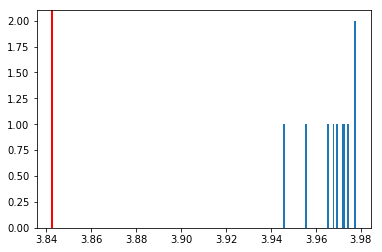

In [49]:
avg_shortest_paths = []
as_graph_degree_sequence = list(nx.degree(as_graph).values())
as_graph_avg_shortest_path_length = nx.average_shortest_path_length(as_graph, weight=None)
print('Original AS Graph average shortest path: {0}'.format(as_graph_avg_shortest_path_length))
for s in range(10):
    null_graph = nx.configuration_model(as_graph_degree_sequence)
    #print(list(nx.degree(null_graph).values()))
    # remove multiple edges
    null_graph = nx.Graph(null_graph)
    #print(list(nx.degree(null_graph).values()))
    # self loops make no sense for airline routes (except maybe scenic flights but USAir had none)
    null_graph.remove_edges_from(null_graph.selfloop_edges())
    #print('is connected:{0}'.format(nx.is_connected(null_graph)))
    # because there are so many nodes with degree 1, null_graph can randomly be disconnected
    # in those cases use sub graphs
    cc_null_graph = max(nx.connected_component_subgraphs(null_graph), key=len)
    avg_shortest_paths.append(nx.average_shortest_path_length(cc_null_graph, weight=None))


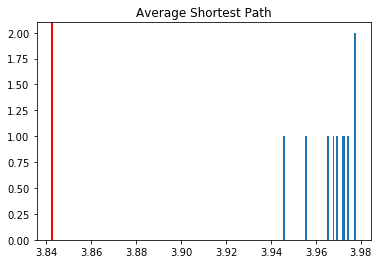

In [65]:
plt.hist(avg_shortest_paths, bins=40)  
plt.axvline(as_graph_avg_shortest_path_length, lw=2, color="red") 
plt.title("Average Shortest Path")
plt.show()

[-3.06391459  0.48250802  0.34745508  0.56895385 -0.29070389  0.31065978
  0.41578931  0.580806    0.43125349 -0.0225128   0.23970576]


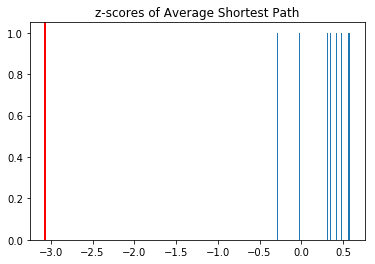

In [63]:
import scipy.stats as stats
zscores = stats.zscore([as_graph_avg_shortest_path_length] +avg_shortest_paths)
print(zscores)
plt.hist(zscores[1:], bins=100)  
plt.axvline(zscores[0], lw=2, color="red") 
plt.title('z-scores of Average Shortest Path')
plt.show()